# MCscan (Python version) to identify syntenic blocks - binderized

(How is [this--> Multiple Collinearity Scan](http://chibba.agtec.uga.edu/duplication/mcscan/) related to https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version) ?)

Everything should be working. No installation necessary. See [here](https://github.com/fomightez/mcscan-binder) about how it works.

-----

This notebook works through [the example workflow][1].

Click on each cell and press `shift-enter` or the run button to run each. Or use alternatives under `Cell` in the menu above this notebook.

You can get to the Jupyter Dashboard by clicking the the Jupyter logo in the upper left corner of this active notebook. There you can see the files in a typical GUI file handling interface. Or simply add a cell at any point and type `ls` to see a listing of the files in the current working directory.

Example Workflow
----------------

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

The [Example Workflow][1] at <https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)> begins with the command `!python2 -m jcvi.apps.fetch phytozome` but the files that fetches have already been put here. So continue with the next commands.  
(Technical reason:  Error when trying that command showed `ftp = FTP(o.netloc)` among the error traceback, and I know MyBinder doesn't allow FTP and so that explains why it won't work here.)

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [1]:
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Vvinifera_145_gene.gff3.gz -o grape.bed

14:56:25 [base] Load file `Vvinifera_145_gene.gff3.gz`
14:56:40 [gff] Extracted 26346 features (type=mRNA id=Name)


In [2]:
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Ppersica_139_gene.gff3.gz -o peach.bed

14:56:41 [base] Load file `Ppersica_139_gene.gff3.gz`
14:56:55 [gff] Extracted 28701 features (type=mRNA id=Name)


'Cleaning' the description lines of the coding sequences (FASTA format) is the next step. This is done to make concise identifiers that match those in the `.bed` file. ( I found matching is important or will get error that identifier not in `.bed` file when trying to run `jcvi.compara.catalog ortholog`.)

To follow what happens in the step, first the next cell will show the first few lines of one of the files before 'cleaning'.

In [3]:
!cp Vvinifera_145_cds.fa.gz Vv_cds.fa.gz
!gunzip Vv_cds.fa.gz
!head Vv_cds.fa

>GSVIVT01000001001|PACid:17816625
ATGGCTTTTGGGCGATTGCGATCGATTCACAATCTGTATCGAACGGCCGAGATTCGACCATTTTCATATCTGCTTGGAAG
CTCTAGAAGCTACTCGATTGTTACAATAAATGTTCCTAAAATTAATTGCTGGGCCACTTCTTACTTCTATAAGGGCCACA
ATGTTCTTCCCTGGACATGTCGAAGCACAATGACACTTCACTCTTCAATGCCTACTGAGCCATGGATCTTGTTGAATGAT
GCAAGGTTGCTAACTACAAGAGCGAAAGCCCCTGCCCAAGTTCGACAAATGGTATCCTATCCTTTCTTTTTGACTGATGG
CAAATATATTGCACTGCCACAAAGCAATTAA
>GSVIVT01000002001|PACid:17816626
ATGGGGTTCTTGGATGCCATACCAAATAAGCATTCACTCCAAGATTCATCCTCCTTTCTCAACACTACTACTGTCATAGC
CCTCTGTTTGTTCTTTGCTCTTCTTTGTGCTTGCATAGTCATTGGCCATCTTCTTGAGGAGCACAGATGGGCCAACGAGT
CAATCACCGCGCTTCTTTTGGGGTTGTGCGCGGGTGTGGTGGTGCTGTTGGTGAGTAAAGGCCGTAGTTCGAAAATTCTT


Now to actually run the 'cleaning' step on the coding sequences.

In [4]:
!python2 -m jcvi.formats.fasta format --sep="|" Vvinifera_145_cds.fa.gz grape.cds
!python2 -m jcvi.formats.fasta format --sep="|" Ppersica_139_cds.fa.gz peach.cds

Let's view the result of the 'cleaning' step.

In [5]:
!head grape.cds

>GSVIVT01000001001
ATGGCTTTTGGGCGATTGCGATCGATTCACAATCTGTATCGAACGGCCGAGATTCGACCA
TTTTCATATCTGCTTGGAAGCTCTAGAAGCTACTCGATTGTTACAATAAATGTTCCTAAA
ATTAATTGCTGGGCCACTTCTTACTTCTATAAGGGCCACAATGTTCTTCCCTGGACATGT
CGAAGCACAATGACACTTCACTCTTCAATGCCTACTGAGCCATGGATCTTGTTGAATGAT
GCAAGGTTGCTAACTACAAGAGCGAAAGCCCCTGCCCAAGTTCGACAAATGGTATCCTAT
CCTTTCTTTTTGACTGATGGCAAATATATTGCACTGCCACAAAGCAATTAA
>GSVIVT01000002001
ATGGGGTTCTTGGATGCCATACCAAATAAGCATTCACTCCAAGATTCATCCTCCTTTCTC
AACACTACTACTGTCATAGCCCTCTGTTTGTTCTTTGCTCTTCTTTGTGCTTGCATAGTC


In [6]:
!python2 -m jcvi.compara.catalog ortholog grape peach

14:57:07 [base] lastdb peach peach.cds
14:57:29 [base] lastal -u 0 -P 16 -i3G -f BlastTab peach grape.cds >grape.peach.last
15:00:49 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:00:49 [base] Load file `grape.bed`
15:00:50 [base] Load file `peach.bed`
15:00:50 [blastfilter] Load BLAST file `grape.peach.last` (total 403868 lines)
15:00:50 [base] Load file `grape.peach.last`
15:00:55 [blastfilter] running the cscore filter (cscore>=0.70) ..
15:00:56 [blastfilter] after filter (294217->31226) ..
15:00:56 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
15:00:57 [blastfilter] after filter (31226->21087) ..
15:00:57 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:00:57 [base] Load file `grape.bed`
15:00:57 [base] Load file `peach.bed`
15:00:58 [base] Load file `grape.peach.last.filtered`
15:00:58 [synteny] A total of 21087 BLAST imported from `grape.peach.last.filtered`.
15:00:58 [synteny] Chaining distance = 20
15:00:58 [base] Load file `grape.peach.anchors

15:01:06 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:01:06 [__init__] backend agg version v2.2
15:01:07 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:01:07 [base] Load file `grape.bed`
15:01:08 [base] Load file `peach.bed`
15:01:09 [dotplot] Showing a random subset of 10000 data points (total 14695) for clarity.
15:01:09 [dotplot] xsize=26346 ysize=28701
15:01:09 [texmanager] serif font is not compatible with usetex.
15:01:09 [texmanager] serif font is not compatible with usetex.
15:01:09 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:01:09 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:01:09 [texmanager] cursive font is not compatible with usetex.
15:01:09 [texmanager] cursive font is not compatible with usetex.
15:01:09 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
15:01:09 [texmanager] monospace font is n

15:01:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr7t.tfm
15:01:10 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr7t.tfm
15:01:10 [dviread] lh=18, bc=0, ec=170, nw=17, nh=16, nd=16
15:01:10 [dviread] find_tex_file(phvr7t.vf): ['kpsewhich', u'phvr7t.vf']
15:01:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/vf/adobe/helvetic/phvr7t.vf
15:01:10 [dviread] Dvi: /usr/share/texlive/texmf-dist/fonts/vf/adobe/helvetic/phvr7t.vf
15:01:10 [dviread] find_tex_file(phvr8r.tfm): ['kpsewhich', u'phvr8r.tfm']
15:01:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr8r.tfm
15:01:10 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/adobe/helvetic/phvr8r.tfm
15:01:10 [dviread] lh=18, bc=1, ec=255, nw=30, nh=16, nd=16
15:01:10 [dviread] find_tex_file(phvr8r.vf): ['kpsewhich', u'phvr8r.vf']
15:01:10 [dviread] find_tex_file result: 
15:01:

15:01:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:01:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:11 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:11 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/bas

15:01:13 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:01:13 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:13 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:13 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:13 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:13 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb

15:01:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:15 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:15 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:15 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:15 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:01:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:17 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:18 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:01:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:20 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:20 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:20 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:01:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:22 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:22 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:22 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:22 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:01:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:24 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:24 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:24 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:01:24 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:24 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:24 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:01:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:26 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:26 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:26 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:26 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:27 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:01:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:29 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:29 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:29 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:01:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:31 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:01:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:33 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:01:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:36 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:36 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:01:36 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:36 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:36 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:01:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:38 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:38 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:38 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:01:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:40 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:40 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:40 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:01:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:43 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:43 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:01:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:45 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:47 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:47 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:01:48 [dotplot] Dot plot title: Inter-genomic comparison: grape vs peach (14,69

15:01:48 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
15:01:49 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:01:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:01:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:01:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:01:49 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
15:01:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:01:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:49 [texmanager] ['latex', '-interaction=no

15:01:49 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:50 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/2a24e88ae4c69087b4758430e46e98a6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:50 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:51 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/01b1a8745c928aef0f0017d5a08660ca.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:51 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/54271af19a84fbdafe7412238e793353.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:52 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:52 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01274c07fa986fb85f6779c2b6c022dc.dvi
15:01:52 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:52 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01274c07fa986fb85f6779c2b6c022dc.dvi
15:01:52 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:52 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:01:52 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:52 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:52 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error

15:01:53 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:53 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/eefceecc2e13cd8f8eb36384e7f0e6e7.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:54 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:54 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:55 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:01:55 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:01:55 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:55 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
15:01:55 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:55 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:01:55 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:55 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:55 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b58b8e57b80fbcf07c4d31990bec772c.dvi
15:01:55 [dviread] Dvi._xxx: encountered special: papersize=5203

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:01:57 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:01:57 [texmanager] serif font is not compatible with usetex.
15:01:57 [texmanager] serif font is not compatible with usetex.
15:01:57 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:01:57 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:01:57 [texmanager] cursive font is not compatible with usetex.
15:01:57 [texmanager] cursive font is not compatible with usetex.
15:01:57 [texmanager] family: cursive, font: Zapf Chancery, info

15:01:57 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:01:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:57 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a3ef8bc0bb0812b984ca7.dvi
15:01:57 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:01:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:57 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3317da40e896b541b28c83ecd2421636.dvi
15:01:57 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:57 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:57 [texmanager] fontconfig: sans-serif

15:01:58 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:01:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/06bdb3ea345986e066295fd3c1e7bfd1.dvi
15:01:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:01:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9c8f18e3423ef18da82023eef743a329.dvi
15:01:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:58 [texmanager] fontconfig: sans-serif

15:01:59 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:01:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/1f2aecc24e6ee9368d5e0ca1f64462b5.dvi
15:01:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:01:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/54271af19a84fbdafe7412238e793353.dvi
15:01:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:59 [texmanager] fontconfig: sans-serif

15:01:59 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:01:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
15:01:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:01:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01274c07fa986fb85f6779c2b6c022dc.dvi
15:01:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:01:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:01:59 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:02:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
15:02:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:00 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/eae0ba2ba909da76eb32c1a86b83e1bd.png', '/home/jovyan/.cache/matplotlib/tex.cache/8600c8283167

15:02:01 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:02:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/446d220c1f8ece0b686923be5c77740d.dvi
15:02:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:02:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:01 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/730556baeecd7cb91ac8e4d5789d3977.dvi
15:02:01 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:01 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:01 [texmanager] fontconfig: sans-serif

15:02:02 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:02:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:02 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
15:02:02 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:02 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:02 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/02d14588d3c5ca012762154c768e20de.png', '/home/jovyan/.cache/matplotlib/tex.cache/b58b8e57b80fbcf07c4d31990bec772c.dvi']
15:02:02 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:02:02 [texmanager] fontconfi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:02:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
15:02:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:03 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
15:02:03 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:03 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:03 [texmanager] fontconfig: sans

In [7]:
!python2 -m jcvi.compara.synteny depth --histogram grape.peach.anchors

15:02:05 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:02:05 [base] Load file `grape.bed`
15:02:05 [base] Load file `peach.bed`
15:02:06 [base] Load file `grape.peach.anchors`
Genome grape depths:
Depth 0: 4,047 of 26,346 (15.4%)
Depth 1: 14,141 of 26,346 (53.7%)
Depth 2: 6,134 of 26,346 (23.3%)
Depth 3: 1,996 of 26,346 (7.6%)
Depth 4: 28 of 26,346 (0.1%)
Genome peach depths:
Depth 0: 3,347 of 28,701 (11.7%)
Depth 1: 16,459 of 28,701 (57.3%)
Depth 2: 7,065 of 28,701 (24.6%)
Depth 3: 1,830 of 28,701 (6.4%)
Depth 4: 0 of 28,701 (0.0%)
15:02:06 [__init__] $HOME=/home/jovyan
15:02:06 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
15:02:06 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
15:02:06 [__init__] matplotlib version 2.2.2
15:02:06 [__init__] interactive is False
15:02:06 [__init__] platform is linux2
15:02:06 [__init__] loaded modules: ['networkx.drawing.n

15:02:06 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
15:02:06 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:02:06 [__init__] backend agg version v2.2
grape vs peach syntenic depths
2:2 pattern
15:02:07 [texmanager] serif font is not compatible with usetex.
15:02:07 [texmanager] serif font is not compatible with usetex.
15:02:07 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:02:07 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:02:07 [texmanager] cursive font is not compatible with usetex.
15:02:07 [texmanager] cursive font is not compatible with usetex.
15:02:07 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
15:02:07 [texmanager] monospace font is not compatible with usetex.
15:02:07 [texmanager] monospace font is not compatible with usetex.
15:02:07 [texmanager] family: monospace, font: Computer Modern Typewriter,

15:02:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr10.tfm
15:02:08 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr10.tfm
15:02:08 [dviread] lh=18, bc=0, ec=127, nw=36, nh=16, nd=10
15:02:08 [dviread] find_tex_file(cmr10.vf): ['kpsewhich', u'cmr10.vf']
15:02:08 [dviread] find_tex_file result: 
15:02:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:08 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:02:08 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:08 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:08 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/87adbbefb589e0bc037a47eef073a2ef.tex']
15:02:08 [te

15:02:08 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/0567c676ca47e285814ded49202d47e9.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:02:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:02:09 [backend_pdf] Assigning font /F2 = phvr8r (dvi)
15:02:09 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:09 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:02:09 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:09 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:09 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5882c4da650094894b182.dvi
15:02:09 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:09 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:09 [dviread] Dvi: /

15:02:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:10 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/ca0f0f37bfafa4a62b58a70764190b68.tex']
15:02:10 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/ca0f0f37bfafa4a62b58a70764190b68.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texl

15:02:11 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/22da34438677174d5367592d516b5377.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:02:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:11 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/fff23fb92ebd4b41d0a46c4279a5acd5.tex']
15:02:11 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/fff23fb92ebd4b41d0a46c4279a5acd5.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/ty

15:02:12 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/8020ab2c4cd42e10b9fcfe0c82330d73.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:02:12 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/d3ac9cc3dd59821301c664adee0d64e3.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:02:13 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/bf00829d8e9d1a37f161962e79ec9120.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:02:13 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:02:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:13 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bfaa0a3437a5882c4da650094894b182.dvi
15:02:13 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:13 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:13 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/28c691a63342643ce52b3d06bce03361.png', '/home/jovyan/.cache/matplotlib/tex.cache/87adbbefb589e0bc037a47eef073a2ef.dvi']
15:02:13 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:02:13 [texmanager] fontconfi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:02:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0ec938eb72cb9c7aab02173281100a1.dvi
15:02:14 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:02:14 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/ca0f0f37bfafa4a62b58a70764190b68.dvi
15:02:14 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

15:02:15 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:02:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:15 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7a22f628b589779d70041019be99aa16.dvi
15:02:15 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:02:15 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:02:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:15 [dviread] Dvi: /home/jovyan/.cache/matplotlib

15:02:15 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:15 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6c64734d2d9944b95499df437ae22358.dvi
15:02:15 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:15 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:15 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/0567c676ca47e285814ded49202d47e9.dvi
15:02:15 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (p

15:02:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:16 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/f42d1ec9e8b3eb97a1dd368eae34a8aa.png', '/home/jovyan/.cache/matplotlib/tex.cache/7b444e1faa51eac8742dd249a28a0e77.dvi']
15:02:16 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:02:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7b444e1faa51eac8742dd249a28a0e77.dvi
15:02:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defa

Let's rename and display couple of the files so we can see the differences they refer to in the example workflow when we just try with the othologs below.

In [8]:
# rename `grape.peach.pdf` and `grape.peach.depth.pdf`
!mv grape.peach.pdf grape.peachDEFAULT.pdf
!mv grape.peach.depth.pdf grape.peach.depthDEFAULT.pdf

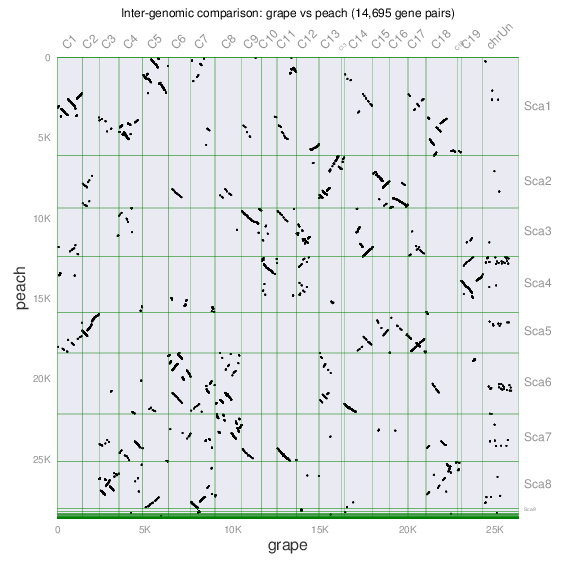

In [9]:
# display `grape.peachDEFAULT.pdf`
from wand.image import Image as WImage
img = WImage(filename="grape.peachDEFAULT.pdf")
img

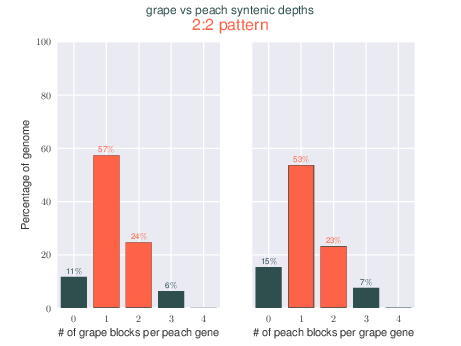

In [10]:
# display `grape.peach.depthDEFAULT.pdf`
from wand.image import Image as WImage
img = WImage(filename="grape.peach.depthDEFAULT.pdf")
img

### Run with setting to collect orthologs

Delete old version of data and re-run with `--cscore=.99` option as discussed in the workflow example.

In [11]:
# remove default run
!rm grape.peach.last.filtered 
# Run to identify orthologs
!python2 -m jcvi.compara.catalog ortholog grape peach --cscore=.99
!python2 -m jcvi.graphics.dotplot grape.peach.anchors

15:02:25 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:02:25 [base] Load file `grape.bed`
15:02:25 [base] Load file `peach.bed`
15:02:26 [blastfilter] Load BLAST file `grape.peach.last` (total 403868 lines)
15:02:26 [base] Load file `grape.peach.last`
15:02:31 [blastfilter] running the cscore filter (cscore>=0.99) ..
15:02:32 [blastfilter] after filter (294217->14417) ..
15:02:32 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
15:02:32 [blastfilter] after filter (14417->13886) ..
15:02:32 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:02:32 [base] Load file `grape.bed`
15:02:33 [base] Load file `peach.bed`
15:02:34 [base] Load file `grape.peach.last.filtered`
15:02:34 [synteny] A total of 13886 BLAST imported from `grape.peach.last.filtered`.
15:02:34 [synteny] Chaining distance = 20
15:02:34 [base] Load file `grape.peach.anchors`
A total of 11511 (NR:11497) anchors found in 369 clusters.
Stats: Min=4 Max=357 N=369 Mean=31.1951219512 SD=44.5398622113 

15:02:41 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:02:42 [__init__] backend agg version v2.2
15:02:42 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:02:42 [base] Load file `grape.bed`
15:02:42 [base] Load file `peach.bed`
15:02:43 [dotplot] Showing a random subset of 10000 data points (total 11511) for clarity.
15:02:43 [dotplot] xsize=26346 ysize=28701
15:02:43 [texmanager] serif font is not compatible with usetex.
15:02:43 [texmanager] serif font is not compatible with usetex.
15:02:43 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:02:43 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:02:43 [texmanager] cursive font is not compatible with usetex.
15:02:43 [texmanager] cursive font is not compatible with usetex.
15:02:43 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
15:02:43 [texmanager] monospace font is n

15:02:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:02:45 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:02:45 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

15:02:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:46 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:02:46 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:02:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:46 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:02:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:02:49 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:02:49 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:02:49 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:02:49 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:02:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:02:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:51 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:02:51 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:02:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:51 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:02:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:53 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:02:53 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:02:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:53 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:02:55 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:55 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:02:56 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:02:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:02:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:02:58 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:02:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:02:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:02:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:03:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:00 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:00 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:03:00 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:00 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:03:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:02 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:02 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:02 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:03:04 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:04 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:05 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:03:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:07 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:03:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:09 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:10 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:03:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:12 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:12 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:03:12 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:12 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:03:14 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:03:14 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:14 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:14 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb

15:03:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:16 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:03:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:18 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:03:20 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:20 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:21 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:21 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:03:22 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
15:03:23 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:23 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:03:23 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:03:23 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
15:03:23 [dviread] Dvi._xxx: encount

15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:03:23 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/54271af19a84fbdafe7412238e793353.dvi
15:03:23 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/54271af19a84fbdafe7412238e793353.dvi
15:03:23 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc

15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
15:03:23 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:03:23 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/351114413d87206b8f58f9fb6fa4bff8.dvi
15:03:23 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:23 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:23 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/351114413d8

15:03:23 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/24b784b8839d6084e4f6e46a4a1251de.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:03:25 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
15:03:25 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f131e64a6b0>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
15:03:25 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:03:25 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyp

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a3ef8bc0bb0812b984ca7.dvi
15:03:25 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a3ef8bc0bb0812b984ca7.dvi
15:03:25 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f932d0fe6cd9b0caff951151521a5c62.dvi
15:03:25 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:03:25 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=5.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:03:25 [texmanager] fontconfig: sans-serifcmrp

15:03:25 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01274c07fa986fb85f6779c2b6c022dc.dvi
15:03:25 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01274c07fa986fb85f6779c2b6c022dc.dvi
15:03:25 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [dviread] Dvi: /home/jovyan/.

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/24b784b8839d6084e4f6e46a4a1251de.dvi
15:03:25 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:25 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/aeb237c6ef899563dc2fa3b27e3b304c.png', '/home/jovyan/.cache/matplotlib/tex.cache/24b784b8839d

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:03:26 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:26 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
15:03:26 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:03:26 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:26 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
15:03:26 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

15:03:28 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
15:03:28 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:03:28 [__init__] backend agg version v2.2
15:03:29 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:03:29 [base] Load file `grape.bed`
15:03:29 [base] Load file `peach.bed`
15:03:30 [dotplot] Showing a random subset of 10000 data points (total 11511) for clarity.
15:03:30 [dotplot] xsize=26346 ysize=28701
15:03:30 [texmanager] serif font is not compatible with usetex.
15:03:30 [texmanager] serif font is not compatible with usetex.
15:03:30 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:03:30 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:03:30 [texmanager] cursive font is not compatible with usetex.
15:03:30 [texmanager] cursive font is not compatible with usetex.
15:03:30 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

15:03:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:31 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:31 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:03:31 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:03:31 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

15:03:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:33 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:03:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:35 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:03:35 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:35 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:03:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:37 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:03:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:40 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:40 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:40 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:03:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:42 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:42 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:42 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:43 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:03:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:45 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:45 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:45 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:03:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:47 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:47 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:47 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:03:47 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:47 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:47 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:03:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:49 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:49 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:49 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:03:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:52 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:52 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:52 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:03:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:54 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:54 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:54 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:03:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:56 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:57 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:57 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:03:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:03:59 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:03:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:03:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:03:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:03:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:03:59 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:03:59 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:04:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:01 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:04:01 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:04:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:01 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:01 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:04:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:04:03 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:04:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:04:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:04:05 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:04:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:04:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:04:07 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:04:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:08 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:08 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:04:09 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
15:04:09 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:04:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:10 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:04:10 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:04:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
15:04:10 [dviread] Dvi._xxx: encount

15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f932d0fe6cd9b0caff951151521a5c62.dvi
15:04:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/01b1a8745c928aef0f0017d5a08660ca.dvi
15:04:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b01af0bc9c57ce9190669c0353c8ff69.dvi
15:04:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b01af0bc9c5

15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/24b784b8839d6084e4f6e46a4a1251de.dvi
15:04:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:04:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
15:04:10 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:10 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:10 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db

15:04:11 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
15:04:11 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f3a1d35fa70>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
15:04:11 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:04:11 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyp

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a3ef8bc0bb0812b984ca7.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f0fbe033c62a3ef8bc0bb0812b984ca7.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/a42248172727c2331616ee4cab4d7741.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/a42248172727c2331616ee4cab4d7741.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/325783f52f029ceeeb14bd43fb65f9fb.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:11 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:11 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
15:04:11 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

In [12]:
# run depth script with ortholog result
!python2 -m jcvi.compara.synteny depth --histogram grape.peach.anchors

15:04:14 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:04:14 [base] Load file `grape.bed`
15:04:14 [base] Load file `peach.bed`
15:04:14 [base] Load file `grape.peach.anchors`
Genome grape depths:
Depth 0: 4,891 of 26,346 (18.6%)
Depth 1: 21,225 of 26,346 (80.6%)
Depth 2: 230 of 26,346 (0.9%)
Genome peach depths:
Depth 0: 4,535 of 28,701 (15.8%)
Depth 1: 23,889 of 28,701 (83.2%)
Depth 2: 277 of 28,701 (1.0%)
15:04:14 [__init__] $HOME=/home/jovyan
15:04:14 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
15:04:14 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
15:04:14 [__init__] matplotlib version 2.2.2
15:04:14 [__init__] interactive is False
15:04:14 [__init__] platform is linux2
15:04:14 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networ

15:04:14 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:04:15 [__init__] backend agg version v2.2
grape vs peach syntenic depths
1:1 pattern
15:04:15 [texmanager] serif font is not compatible with usetex.
15:04:15 [texmanager] serif font is not compatible with usetex.
15:04:15 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:04:15 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:04:15 [texmanager] cursive font is not compatible with usetex.
15:04:15 [texmanager] cursive font is not compatible with usetex.
15:04:15 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
15:04:15 [texmanager] monospace font is not compatible with usetex.
15:04:15 [texmanager] monospace font is not compatible with usetex.
15:04:15 [texmanager] family: monospace, font: Computer Modern Typewriter, info: ('cmtt', '')
15:04:15 [texmanager] following keys cha

15:04:16 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
15:04:16 [dviread] find_tex_file(cmr10.pfb): ['kpsewhich', 'cmr10.pfb']
15:04:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr10.pfb
15:04:16 [backend_pdf] Assigning font /F1 = cmr10 (dvi)
15:04:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/87adbbefb589e0bc037a47eef073a2ef.dvi
15:04:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/69d7749e94f78edb9d8c916ca2697dd8.dvi
15:04:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:16 [dviread] Dvi:

15:04:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr8.tfm
15:04:17 [dviread] opening tfm file /usr/share/texlive/texmf-dist/fonts/tfm/public/cm/cmr8.tfm
15:04:17 [dviread] lh=18, bc=0, ec=127, nw=35, nh=16, nd=10
15:04:17 [dviread] find_tex_file(cmr8.vf): ['kpsewhich', u'cmr8.vf']
15:04:17 [dviread] find_tex_file result: 
15:04:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:17 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/94790cbadf0ebd4c3b69ac75f6fbd8fe.dvi
15:04:17 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:17 [dviread] find_tex_file(cmr8.pfb): ['kpsewhich', 'cmr8.pfb']
15:04:17 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr8.pfb
15:04:17 [backend_pdf] Assigning font /F3 = cmr8 (dvi)
15:04:17 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:17 [dviread] Dvi: /home/

15:04:18 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/381425224300d4c9f2c591e9f6c90bb6.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:18 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:04:18 [texmanager] serif font is not compatible with usetex.
15:04:18 [texmanager] serif font is not compatible with usetex.
15:04:18 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:04:18 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:04:18 [texmanager] cursive font is not compatible with usetex.
15:04:18 [texmanager] cursive font is not compatible with usetex.
15:04:18 [texmanager] family: cursive, font: Zapf Chancery, info

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:18 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:04:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/a3d72a23939b7c48bf135157e28a6c86.dvi
15:04:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:18 [texmanager] fontconfig: sans-serifcmr

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/5cc49740901d764cb48c7fccf41c715c.dvi
15:04:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:18 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/7c7be13bfbf95a6dea3e6b7ebd3d1b05.png', '/home/jovyan/.cache/matplotlib/tex.cache/5cc49740901d

15:04:19 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:04:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/eb36ea906494e01f114f3d7aae747b69.dvi
15:04:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/eb36ea906494e01f114f3d7aae747b69.dvi
15:04:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.439

Rename so very clear which is which.

In [13]:
# rename `grape.peach.pdf` and `grape.peach.depth.pdf`
!mv grape.peach.pdf grape.peachORTH.pdf
!mv grape.peach.depth.pdf grape.peach.depthORTH.pdf

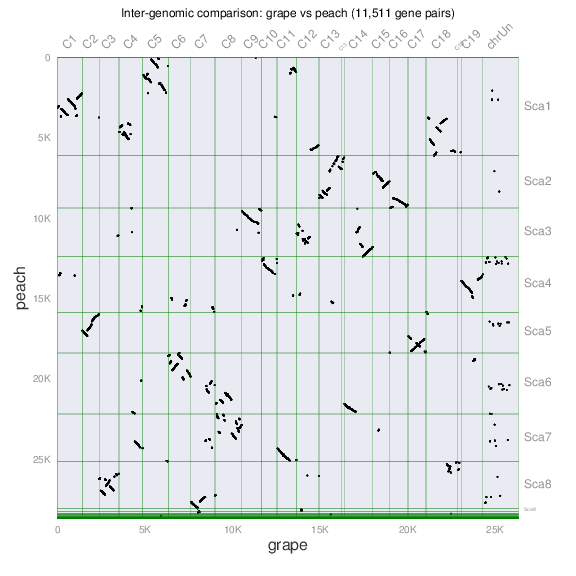

In [14]:
# display `grape.peachORTH.pdf` **ORTHOLOGS SETTING RESULT**
from wand.image import Image as WImage
img = WImage(filename="grape.peachORTH.pdf")
img

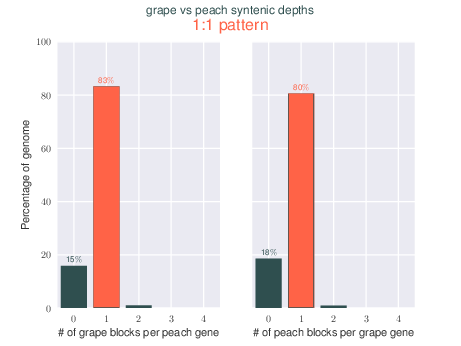

In [15]:
# display `grape.peach.depthORTH.pdf` **ORTHOLOGS SETTING RESULT**
from wand.image import Image as WImage
img = WImage(filename="grape.peach.depthORTH.pdf")
img

### Macrosynteny visualization

In [16]:
# Make seqids content match example code
seqids_string='''chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8'''
!echo "{seqids_string}">seqids

In [17]:
#Change layout to match example (see https://matplotlib.org/gallery/color/named_colors.html for colors)
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      coral, Grape, top, grape.bed
 .4,     .1,    .8,       0,      plum, Peach, top, peach.bed
# edges
e, 0, 1, grape.peach.anchors.simple'''
!echo "{layout_string}">layout

Leaving the color settings blank/default in the cases where that was how it was shown in the code in the example workflow resulted in inconsistent outcomes, probably because the examples were run at different times and not in order as they are here. Colors have been set to match the examples throughout this notebook to be reproducible. 

In [18]:
# Make `.simple` file
!python2 -m jcvi.compara.synteny screen --minspan=30 --simple grape.peach.anchors grape.peach.anchors.new 

15:04:27 [base] Load file `grape.peach.anchors`
15:04:27 [synteny] Assuming --qbed=grape.bed --sbed=peach.bed
15:04:27 [base] Load file `grape.bed`
15:04:28 [base] Load file `peach.bed`
15:04:28 [base] Load file `grape.peach.anchors.new`
15:04:28 [base] Load file `grape.bed`
15:04:29 [base] Load file `peach.bed`
15:04:29 [synteny] A total of 179 blocks written to `grape.peach.anchors.simple`.
15:04:29 [synteny] Before: 369 blocks, After: 179 blocks


In [19]:
!python2 -m jcvi.graphics.karyotype seqids layout

15:04:31 [__init__] $HOME=/home/jovyan
15:04:31 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
15:04:31 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
15:04:31 [__init__] matplotlib version 2.2.2
15:04:31 [__init__] interactive is False
15:04:31 [__init__] platform is linux2
15:04:31 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx

15:04:31 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
15:04:31 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:04:31 [__init__] backend agg version v2.2
15:04:32 [base] Load file `layout`
15:04:32 [base] Load file `grape.bed`
15:04:32 [base] Load file `peach.bed`
15:04:34 [texmanager] serif font is not compatible with usetex.
15:04:34 [texmanager] serif font is not compatible with usetex.
15:04:34 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:04:34 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:04:34 [texmanager] cursive font is not compatible with usetex.
15:04:34 [texmanager] cursive font is not compatible with usetex.
15:04:34 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
15:04:34 [texmanager] monospace font is not compatible with usetex.
15:04:34 [texmanager] monospace font is not compatible with usetex.
15:04:

15:04:35 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
15:04:35 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:04:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:04:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:04:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:04:35 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
15:04:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:35 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:04:35 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:35 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:35 [texmanager] ['latex', '-interaction=no

15:04:36 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/28c55607265124db7b3ecf63382df0c1.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:04:36 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/e071f5f23437e665a84006648786ae70.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:04:37 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:04:37 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:04:38 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/b6e1395f9713468af88c38e77283fc1f.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:04:38 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f33a202cd68146e5d4d3a.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:38 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:04:38 [texmanager] serif font is not compatible with usetex.
15:04:38 [texmanager] serif font is not compatible with usetex.
15:04:38 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:04:38 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:04:38 [texmanager] cursive font is not compatible with usetex.
15:04:38 [texmanager] cursive font is not compatible with usetex.
15:04:38 [texmanager] family: cursive, font: Zapf Chancery, info

15:04:39 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:04:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/147e663fb3cc64f73d440168625dfd19.dvi
15:04:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/916c6639f11b2f601035ad5d50405405.dvi
15:04:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:39 [texmanager] fontconfig: sans-serif

15:04:39 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:04:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/986a828180d7f72ea1a6a51fbf75caaa.dvi
15:04:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:39 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/126f6d0ea8ce67416c1189ca82f75f83.dvi
15:04:39 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:39 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:39 [texmanager] fontconfig: sans-serif

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/71dec7e1e9f3d23ad69f99b5e438cae2.dvi
15:04:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:40 [texmanager] ['dvipng', '-bg', 'Transparent', '-D', '100.0', '-T', 'tight', '-o', '/home/jovyan/.cache/matplotlib/tex.cache/9c47be00c994f8d8d6fab379af776088.png', '/home/jovyan/.cache/matplotlib/tex.cache/71dec7e1e9f3

15:04:41 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:04:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/4b647665e15f33a202cd68146e5d4d3a.dvi
15:04:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9e4836194386a8e6e9933104318eb05d.dvi
15:04:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:41 [texmanager] fontconfig: sans-serif

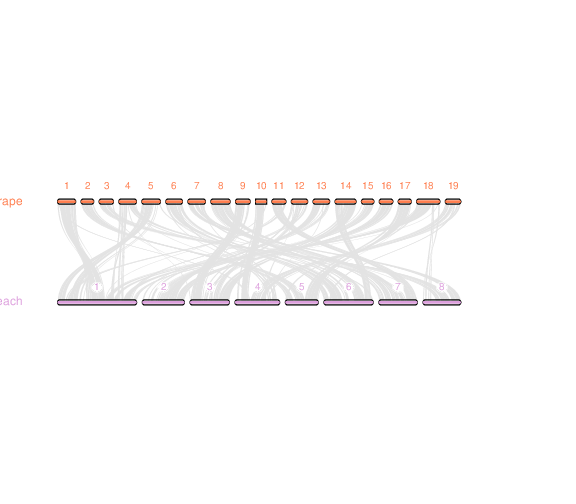

In [20]:
# display karyotype.pdf (rename it too so retained during next steps)
!mv karyotype.pdf karyotypeDEFAULT.pdf
from wand.image import Image as WImage
img = WImage(filename="karyotypeDEFAULT.pdf")
img

**Add highlight.**

In [21]:
# Not mentioned but clearly layout was edited to get different colors
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .6,     .1,    .8,       0,      gold, Grape, top, grape.bed
 .4,     .1,    .8,       0,      yellowgreen, Peach, top, peach.bed
# edges
e, 0, 1, grape.peach.anchors.simple'''
!echo "{layout_string}">layout

In [22]:
# Add `g*` to start of first line of grape.peach.anchors.simple 
!sed -i '1 s/^/g\*/' grape.peach.anchors.simple 
#see https://stackoverflow.com/a/12318347/8508004 &
# https://superuser.com/a/246841 for sed command to prepend inplace on same line and not above first line

In [23]:
!python2 -m jcvi.graphics.karyotype seqids layout

15:04:47 [__init__] $HOME=/home/jovyan
15:04:47 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
15:04:47 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
15:04:47 [__init__] matplotlib version 2.2.2
15:04:47 [__init__] interactive is False
15:04:47 [__init__] platform is linux2
15:04:47 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx

15:04:47 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
15:04:47 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:04:47 [__init__] backend agg version v2.2
15:04:48 [base] Load file `layout`
15:04:48 [base] Load file `grape.bed`
15:04:48 [base] Load file `peach.bed`
15:04:50 [texmanager] serif font is not compatible with usetex.
15:04:50 [texmanager] serif font is not compatible with usetex.
15:04:50 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:04:50 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:04:50 [texmanager] cursive font is not compatible with usetex.
15:04:50 [texmanager] cursive font is not compatible with usetex.
15:04:50 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
15:04:50 [texmanager] monospace font is not compatible with usetex.
15:04:50 [texmanager] monospace font is not compatible with usetex.
15:04:

15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bd074d6e540d81593bbab8e6c2367132.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bd074d6e540d81593bbab8e6c2367132.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db

15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/71dec7e1e9f3d23ad69f99b5e438cae2.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/71dec7e1e9f3d23ad69f99b5e438cae2.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203

15:04:51 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:04:51 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'question/at', 'A', 'B', 'C/D', 'E', 'F', 'G/H', 'I', 'J', 'K/L', 'M', 'N', 'O/P', 'Q', 'R', 'S/T', 'U', 'V', 'W/X', 'Y', 'Z', 'bracketleft/backslash', 'bracketright', 'asciicircum', 'underscore/quoteleft', 'a', 'b', 'c/d', 'e', 'f', 'g/h', 'i', 'j', 'k/l', 'm', 'n', 'o/p',

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/28c55607265124db7b3ecf63382df0c1.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/28c55607265124db7b3ecf63382df0c1.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/252a1e31ea397c3ca3d0a7569146ef2a.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/252a1e31ea397c3ca3d0a7569146ef2a.dvi
15:04:51 [dviread] Dvi._xxx: encounter

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/e071f5f23437e665a84006648786ae70.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:04:51 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/e071f5f23437e665a84006648786ae70.dvi
15:04:51 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

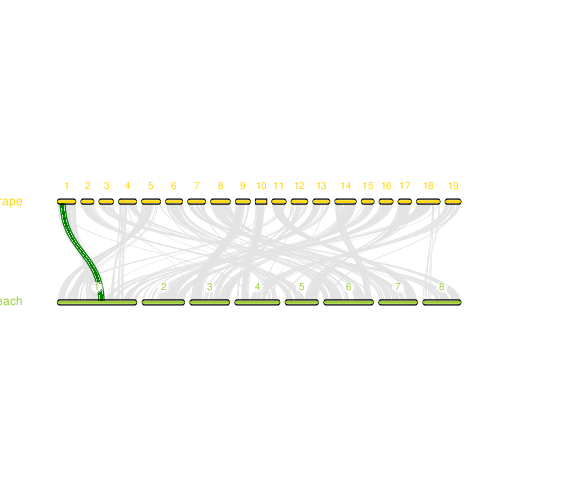

In [24]:
# display karyotype.pdf (rename it too so clear it is the second one)
!mv karyotype.pdf karyotypeHIGHLIGHT.pdf
from wand.image import Image as WImage
img = WImage(filename="karyotypeHIGHLIGHT.pdf")
img

### Macrosynteny getting fancy

This section will continue to work through the corresponding section in [the example workflow][1].

As with data above, the `Tcacao` data has been included already in this running Binder session for this section.

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [25]:
!python2 -m jcvi.formats.fasta format --sep="|" Tcacao_233_cds.fa.gz cacao.cds
!python2 -m jcvi.formats.gff bed --type=mRNA --key=Name Tcacao_233_gene.gff3.gz -o cacao.bed
!python2 -m jcvi.compara.catalog ortholog peach cacao --cscore=.99
!python2 -m jcvi.compara.synteny screen --minspan=30 --simple peach.cacao.anchors peach.cacao.anchors.new

15:04:58 [base] Load file `Tcacao_233_gene.gff3.gz`
15:05:25 [gff] Extracted 44404 features (type=mRNA id=Name)
15:05:26 [base] lastdb cacao cacao.cds
15:06:56 [base] lastal -u 0 -P 16 -i3G -f BlastTab cacao peach.cds >peach.cacao.last
15:11:17 [synteny] Assuming --qbed=peach.bed --sbed=cacao.bed
15:11:17 [base] Load file `peach.bed`
15:11:17 [base] Load file `cacao.bed`
15:11:18 [blastfilter] Load BLAST file `peach.cacao.last` (total 514735 lines)
15:11:18 [base] Load file `peach.cacao.last`
15:11:24 [blastfilter] running the cscore filter (cscore>=0.99) ..
15:11:24 [blastfilter] after filter (384811->21515) ..
15:11:24 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
15:11:25 [blastfilter] after filter (21515->15817) ..
15:11:25 [synteny] Assuming --qbed=peach.bed --sbed=cacao.bed
15:11:25 [base] Load file `peach.bed`
15:11:26 [base] Load file `cacao.bed`
15:11:26 [base] Load file `peach.cacao.last.filtered`
15:11:26 [synteny] A total of 15817 BLAST imported from `peac

15:11:36 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
15:11:36 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:11:36 [__init__] backend agg version v2.2
15:11:37 [synteny] Assuming --qbed=peach.bed --sbed=cacao.bed
15:11:37 [base] Load file `peach.bed`
15:11:37 [base] Load file `cacao.bed`
15:11:38 [dotplot] Showing a random subset of 10000 data points (total 13604) for clarity.
15:11:38 [dotplot] xsize=28701 ysize=44404
15:11:38 [texmanager] serif font is not compatible with usetex.
15:11:38 [texmanager] serif font is not compatible with usetex.
15:11:38 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:11:38 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:11:38 [texmanager] cursive font is not compatible with usetex.
15:11:38 [texmanager] cursive font is not compatible with usetex.
15:11:38 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

15:11:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:40 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:11:40 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:11:40 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

15:11:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:11:41 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:11:41 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:41 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:42 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:11:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:44 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:11:44 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:11:44 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:11:44 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:11:44 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:11:44 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:11:46 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:11:46 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:11:46 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:11:46 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:11:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:46 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:46 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:11:46 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:11:46 [dvirea

15:11:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:11:48 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:11:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:48 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:48 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:11:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:50 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:50 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:11:50 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:11:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:51 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:51 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:11:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:53 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:11:53 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:11:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:53 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:11:55 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:55 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:55 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:11:55 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:11:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:56 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:56 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:11:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:11:58 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:11:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:11:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:11:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:11:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:11:58 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:11:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:12:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:12:00 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:12:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:02 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:12:02 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:03 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:03 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:12:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:12:05 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:05 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:12:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:12:07 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:12:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:12:09 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:09 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:12:09 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:09 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:12:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:11 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:12:12 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:12:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:12:14 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:12:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:12:16 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:12:18 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
15:12:18 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:12:18 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
15:12:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:12:18 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:18 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:18 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/da424f824d7f8700124c08ce01d392b4.dvi
15:12:18 [dviread] Dvi._xxx: encount

15:12:19 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/96628ec5d29ef1243f737e120d0a4cd5.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:12:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
15:12:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:12:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
15:12:19 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:19 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:19 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:12:19 [dviread] Dvi._xxx: encountered special: papersize=5203

15:12:19 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/203da42471cedbb39c25d28a10edfe9d.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdi

15:12:20 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:20 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f7ee620ae4655b3c0e3508a2ba0251b1.dvi
15:12:20 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:20 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:20 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:20 [texmanager] ['latex', '-interaction=nonstopmode', '--halt-on-error', '/home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.tex']
15:12:20 [texmanager] This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 84 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/a

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
15:12:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/8600c828316760be68cbae2251604ecb.dvi
15:12:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/eefceecc2e13cd8f8eb36384e7f0e6e7.dvi
15:12:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/eefceecc2e13cd8f8eb36384e7f0e6e7.dvi
15:12:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-s

15:12:21 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:12:21 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:21 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
15:12:21 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:22 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:22 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7623af5007db5ba5679ad4c13ed70f54.dvi
15:12:22 [dviread] Dvi._xxx: encoun

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:22 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:22 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/38bd6b3111ec14e1e7f734848ecb7888.dvi
15:12:22 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:22 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:22 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
15:12:22 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

15:12:22 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:12:22 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:22 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/f4dd946bc31a5682c85010bfba97691c.dvi
15:12:22 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:22 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:22 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/ef2167ebac9182da156f460b7e532408.dvi
15:12:22 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:22 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:22 [texmanager] fontconfig: sans-serif

In [26]:
#Change layout to match example (see https://matplotlib.org/gallery/color/named_colors.html for colors)
layout_string='''# y, xstart, xend, rotation, color, label, va,  bed
 .7,     .1,    .8,      15,      violet, Grape, top, grape.bed
 .5,     .1,    .8,       0,      steelblue, Peach, top, peach.bed
 .3,     .1,    .8,     -15,      silver, Cacao, bottom, cacao.bed
# edges
e, 0, 1, grape.peach.anchors.simple
e, 1, 2, peach.cacao.anchors.simple'''
!echo "{layout_string}">layout

In [27]:
#Change seqids to match example
seqids_string='''chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8
scaffold_1,scaffold_2,scaffold_3,scaffold_4,scaffold_5,scaffold_6,scaffold_7,scaffold_8,scaffold_9,scaffold_10r'''
!echo "{seqids_string}">seqids

In [28]:
!python2 -m jcvi.graphics.karyotype seqids layout

15:12:31 [__init__] $HOME=/home/jovyan
15:12:31 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
15:12:31 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
15:12:31 [__init__] matplotlib version 2.2.2
15:12:31 [__init__] interactive is False
15:12:31 [__init__] platform is linux2
15:12:31 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'jcvi.graphics.chromosome', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx

15:12:31 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
15:12:31 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:12:31 [__init__] backend agg version v2.2
15:12:32 [base] Load file `layout`
15:12:32 [base] Load file `grape.bed`
15:12:33 [base] Load file `peach.bed`
15:12:34 [base] Load file `cacao.bed`
15:12:36 [texmanager] serif font is not compatible with usetex.
15:12:36 [texmanager] serif font is not compatible with usetex.
15:12:36 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:12:36 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:12:36 [texmanager] cursive font is not compatible with usetex.
15:12:36 [texmanager] cursive font is not compatible with usetex.
15:12:36 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usepackage{chancery}')
15:12:36 [texmanager] monospace font is not compatible with usetex.
15:12:36 [texmanager] monospace font

15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bd074d6e540d81593bbab8e6c2367132.dvi
15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/bd074d6e540d81593bbab8e6c2367132.dvi
15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc

15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.dvi
15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6e0a75fbbd57688e16d7507cbe5ad959.dvi
15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/986a828180d7f72ea1a6a51fbf75caaa.dvi
15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/986a828180d7f72ea1a6a51fbf75caaa.dvi
15:12:37 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:37 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:37 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:37 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:12:37 [texmanager] serif font is not compatible with usetex.
15:12:37 [texmanager] serif font is not compatible with usetex.
15:12:37 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:12:37 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:12:37 [texmanager] cursive font is not compatible with usetex.
15:12:37 [texmanager] cursive font is not compatible with usetex.
15:12:37 [texmanager] family: cursive, font: Zapf Chancery, info

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
15:12:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
15:12:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/061eb7581678ad6ad393e68a2abd2869.dvi
15:12:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/91a3269948a6d840dd238bf65572097d.dvi
15:12:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:38 [texmanager] fontconfig: sans

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9e4836194386a8e6e9933104318eb05d.dvi
15:12:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9e4836194386a8e6e9933104318eb05d.dvi
15:12:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

15:12:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
15:12:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:38 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/660e75d47eab547b28012734ed38c7f5.dvi
15:12:38 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-

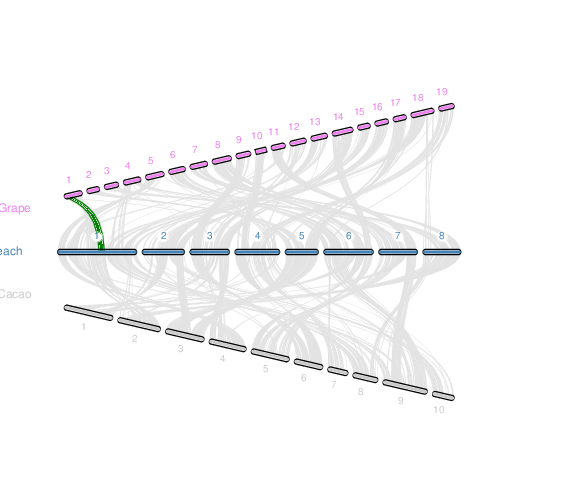

In [29]:
# display karyotype.pdf (rename it too so clear it is the three genome one)
!mv karyotype.pdf karyotypeTHREE.pdf
from wand.image import Image as WImage
img = WImage(filename="karyotypeTHREE.pdf")
img

### Microsynteny visualization

This section will continue to work through the corresponding section in [the example workflow][1].

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [30]:
!python2 -m jcvi.compara.synteny mcscan grape.bed grape.peach.lifted.anchors --iter=1 -o grape.peach.i1.blocks

15:12:42 [base] Load file `grape.bed`
15:12:42 [base] Load file `grape.peach.lifted.anchors`
Chain started: 369 blocks
Chain 0: score=15493 23 blocks remained..
15:12:45 [synteny] MCscan blocks written to `grape.peach.i1.blocks`.


In [31]:
!head -50 grape.peach.i1.blocks > blocks

In [32]:
#Make blocks.layout to match example
blocks_layout_string='''# x,   y, rotation,   ha,     va,   color, ratio,            label
0.5, 0.6,        0, left, center,       m,     1,       grape Chr1
0.5, 0.4,        0, left, center, #fc8d62,     1, peach scaffold_1
# edges
e, 0, 1'''
!echo "{blocks_layout_string}">blocks.layout

In [33]:
!cat grape.bed peach.bed > grape_peach.bed
!python2 -m jcvi.graphics.synteny blocks grape_peach.bed blocks.layout

15:12:49 [__init__] $HOME=/home/jovyan
15:12:49 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
15:12:49 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
15:12:49 [__init__] matplotlib version 2.2.2
15:12:49 [__init__] interactive is False
15:12:49 [__init__] platform is linux2
15:12:49 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx.algorithms.community.scipy'

15:12:50 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
15:12:50 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:12:50 [__init__] backend agg version v2.2
15:12:50 [base] Load file `grape_peach.bed`
15:12:51 [base] Load file `blocks`
15:12:51 [base] Load file `blocks.layout`
Column 0: GSVIVT01012261001 - GSVIVT01012208001 (chr1:10731-562819)
  chr1 .. 50 (50) features .. +
Column 1: ppa015711m - ppa005716m (scaffold_1:27681744-28110947)
  scaffold_1 .. 81 (39) features .. -
15:12:52 [texmanager] serif font is not compatible with usetex.
15:12:52 [texmanager] serif font is not compatible with usetex.
15:12:52 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:12:52 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:12:52 [texmanager] cursive font is not compatible with usetex.
15:12:52 [texmanager] cursive font is not compatible with usetex.
15:12:52 [texmanager] family:

15:12:52 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
15:12:53 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:12:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:12:53 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:12:53 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:12:53 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
15:12:53 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:53 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:12:53 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:53 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:53 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:53 [texmanager] ['latex', '-interaction=no

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:53 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:12:53 [texmanager] serif font is not compatible with usetex.
15:12:53 [texmanager] serif font is not compatible with usetex.
15:12:53 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:12:53 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:12:53 [texmanager] cursive font is not compatible with usetex.
15:12:53 [texmanager] cursive font is not compatible with usetex.
15:12:53 [texmanager] family: cursive, font: Zapf Chancery, info

15:12:54 [texmanager] This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

15:12:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3489e11d13be253aa129baf740c55e8a.dvi
15:12:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:12:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:54 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6bb0c8169b97d5c95feadb9edbf95899.dvi
15:12:54 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:12:54 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:12:54 [texmanager] fontconfig: sans-serif

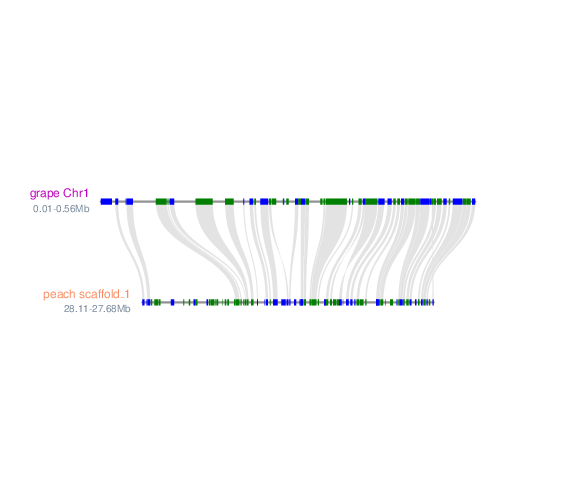

In [34]:
# display blocks.pdf (rename it too so it remains when next section run)
!mv blocks.pdf blocksVIS.pdf
from wand.image import Image as WImage
img = WImage(filename="blocksVIS.pdf")
img

### Microsynteny getting fancy

This section will continue to work through the corresponding section in [the example workflow][1].

[1]: https://github.com/tanghaibao/jcvi/wiki/MCscan-(Python-version)

In [35]:
!python2 -m jcvi.compara.catalog ortholog grape cacao --cscore=.99
!python2 -m jcvi.compara.synteny mcscan grape.bed grape.cacao.lifted.anchors --iter=1 -o grape.cacao.i1.blocks

15:12:57 [cbook] File `cacao.prj` exists. Computation skipped.
15:12:57 [base] lastal -u 0 -P 16 -i3G -f BlastTab cacao grape.cds >grape.cacao.last
15:16:36 [synteny] Assuming --qbed=grape.bed --sbed=cacao.bed
15:16:36 [base] Load file `grape.bed`
15:16:37 [base] Load file `cacao.bed`
15:16:38 [blastfilter] Load BLAST file `grape.cacao.last` (total 499456 lines)
15:16:38 [base] Load file `grape.cacao.last`
15:16:44 [blastfilter] running the cscore filter (cscore>=0.99) ..
15:16:45 [blastfilter] after filter (359783->19185) ..
15:16:45 [blastfilter] running the local dups filter (tandem_Nmax=10) ..
15:16:45 [blastfilter] after filter (19185->14313) ..
15:16:46 [synteny] Assuming --qbed=grape.bed --sbed=cacao.bed
15:16:46 [base] Load file `grape.bed`
15:16:46 [base] Load file `cacao.bed`
15:16:47 [base] Load file `grape.cacao.last.filtered`
15:16:47 [synteny] A total of 14313 BLAST imported from `grape.cacao.last.filtered`.
15:16:47 [synteny] Chaining distance = 20
15:16:47 [base] Load f

15:16:57 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
15:16:57 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:16:57 [__init__] backend agg version v2.2
15:16:57 [synteny] Assuming --qbed=grape.bed --sbed=cacao.bed
15:16:57 [base] Load file `grape.bed`
15:16:58 [base] Load file `cacao.bed`
15:16:59 [dotplot] Showing a random subset of 10000 data points (total 11914) for clarity.
15:16:59 [dotplot] xsize=26346 ysize=44404
15:16:59 [texmanager] serif font is not compatible with usetex.
15:16:59 [texmanager] serif font is not compatible with usetex.
15:16:59 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:16:59 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:16:59 [texmanager] cursive font is not compatible with usetex.
15:16:59 [texmanager] cursive font is not compatible with usetex.
15:16:59 [texmanager] family: cursive, font: Zapf Chancery, info: ('pzc', '\\usep

15:17:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:00 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:00 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:17:00 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:17:00 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyphen', 'period', 'slash/zero', 'one', 'two', 'three/four', 'five', 'six', 'seven/eight', 'nine', 'colon', 'semicolon/less', 'equal', 'greater', 'q

15:17:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:02 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:02 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:02 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:02 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:17:04 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:04 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:04 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:04 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:04 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:17:04 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:04 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:05 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:17:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:07 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:07 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:07 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:17:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:09 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:09 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:09 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:17:11 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:11 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:12 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:12 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:12 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:17:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:14 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:14 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:14 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:17:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:16 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:16 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:16 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:17:16 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:16 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:16 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:17:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:18 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:18 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:18 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:19 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:19 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:17:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:21 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:21 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:21 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:21 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:17:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:23 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:23 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:23 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:23 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:17:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:25 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:25 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:25 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:17:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:28 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (49) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:28 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:28 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7cd776f1b72b9362ca43fd6c0bfca2d6.dvi
15:17:28 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:28 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:28 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/hel

15:17:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (99) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:30 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:30 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:30 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:17:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (104) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:33 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:33 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:33 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:17:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (114) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:35 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:35 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:35 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The

15:17:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The glyph (48) of font (/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb) cannot be converted with the encoding. Glyph may be wrong
  "be wrong" % (glyph, font_bunch.filename))
15:17:37 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:37 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:37 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:38 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/textpath.py:389: UserWarning: The 

15:17:39 [dviread] find_tex_file result: /var/lib/texmf/fonts/map/pdftex/updmap/pdftex.map
15:17:39 [dviread] find_tex_file(uhvr8a.pfb): ['kpsewhich', 'uhvr8a.pfb']
15:17:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb
15:17:40 [dviread] find_tex_file(8r.enc): ['kpsewhich', '8r.enc']
15:17:40 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:17:40 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
15:17:40 [dviread] Dvi._xxx: encount

15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/c0a03e6224343512cb1d881ae2e63f7e.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9369fa58e3293cf82190941da3505ccc.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/9369fa58e3293cf82190941da3505ccc.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203

15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3a617ea86ce32b80af54ad6d37113f3a.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/3a617ea86ce32b80af54ad6d37113f3a.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/349983685cc735e1492e5b1ebec5dab8.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d0b209618f8b4e9373c4de3685ab2cd6.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/b58b8e57b80fbcf07c4d31990bec772c.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:40 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/38bd6b3111ec14e1e7f734848ecb7888.dvi
15:17:40 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:40 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e980099

15:17:41 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
15:17:41 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7fedf4bf46b0>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
15:17:41 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:17:41 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotlessj', 'ff/ffi', 'ffl', 'notequal', 'infinity/lessequal', 'greaterequal', 'partialdiff', 'summation/product', 'pi', 'grave', 'quotesingle/space', 'exclam', 'quotedbl', 'numbersign/dollar', 'percent', 'ampersand', 'quoteright/parenleft', 'parenright', 'asterisk', 'plus/comma', 'hyp

15:17:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d60de6c333e8ed76aa45461974e51bf4.dvi
15:17:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d264bf00a2e9e3c0e8a2cdb1e872a584.dvi
15:17:41 [dviread] Dvi._xxx: encounter

15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/06bdb3ea345986e066295fd3c1e7bfd1.dvi
15:17:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/06bdb3ea345986e066295fd3c1e7bfd1.dvi
15:17:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:17:41 [texmanager] fontconfig: sans

15:17:41 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=6.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
15:17:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:41 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/6776d592fe408de593e561fb9fca0f38.dvi
15:17:41 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.4399

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/12ad8c5c03e3b2f9e160089bd2fc733f.dvi
15:17:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/12ad8c5c03e3b2f9e160089bd2fc733f.dvi
15:17:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/s

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
15:17:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d6a663b311492c9adbdc3189a77bead7.dvi
15:17:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:42 [texmanager] fontconfig: sans

/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/11a81aea956f9cf27bd649e250958be4.dvi
15:17:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
15:17:42 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:42 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/203da42471cedbb39c25d28a10edfe9d.dvi
15:17:42 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.

In [36]:
!python2 -m jcvi.formats.base join grape.peach.i1.blocks grape.cacao.i1.blocks --noheader | cut -f1,2,4,6 > grape.blocks
!head -50 grape.blocks > blocks2

15:17:49 [base] Load file `grape.peach.i1.blocks`
15:17:49 [base] Imported 26346 records from `grape.peach.i1.blocks`.
15:17:49 [base] Load file `grape.cacao.i1.blocks`
15:17:49 [base] Imported 26346 records from `grape.cacao.i1.blocks`.


In [37]:
#Make blocks2.layout to match example
blocks2_layout_string='''# x,   y, rotation,     ha,     va, color, ratio,            label
0.5, 0.6,        0, center,    top,      ,     1,       grape Chr1
0.3, 0.4,        0, center, bottom,      ,    .5, peach scaffold_1
0.7, 0.4,        0, center, bottom,      ,    .5, cacao scaffold_2
# edges
e, 0, 1
e, 0, 2'''
!echo "{blocks2_layout_string}">blocks2.layout

In [38]:
!cat grape.bed peach.bed cacao.bed > grape_peach_cacao.bed
!python2 -m jcvi.graphics.synteny blocks2 grape_peach_cacao.bed blocks2.layout

15:17:54 [__init__] $HOME=/home/jovyan
15:17:54 [__init__] matplotlib data path /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data
15:17:54 [__init__] loaded rc file /srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc
15:17:54 [__init__] matplotlib version 2.2.2
15:17:54 [__init__] interactive is False
15:17:54 [__init__] platform is linux2
15:17:54 [__init__] loaded modules: ['networkx.drawing.nx_pylab', 'email.MIMEAudio', 'numpy.core.info', 'networkx.algorithms.assortativity.collections', 'Bio.SeqIO.UniprotIO', 'networkx.generators.trees', 'jcvi.apps.base', 'ctypes.os', 'Bio.os', 'networkx.readwrite.multiline_adjlist', 'runpy', 'gc', 'distutils.sysconfig', 'pkg_resources._vendor.traceback', 'networkx.linalg.laplacianmatrix', 'matplotlib.cbook._backports', 'email.warnings', 'Bio._py3k.urllib2', 'logging.weakref', 'networkx.algorithms.components.strongly_connected', 'jcvi.formats.blast', 'pprint', 'networkx.algorithms.community.scipy'

15:17:54 [__init__] CACHEDIR=/home/jovyan/.cache/matplotlib
15:17:54 [font_manager] Using fontManager instance from /home/jovyan/.cache/matplotlib/fontList.json
15:17:54 [__init__] backend agg version v2.2
15:17:55 [base] Load file `grape_peach_cacao.bed`
15:17:56 [base] Load file `blocks2`
15:17:56 [base] Load file `blocks2.layout`
Column 0: GSVIVT01012261001 - GSVIVT01012208001 (chr1:10731-562819)
  chr1 .. 50 (50) features .. +
Column 1: ppa015711m - ppa005716m (scaffold_1:27681744-28110947)
  scaffold_1 .. 138 (39) features .. -
Column 2: Thecc1EG011472t1 - Thecc1EG011564t1 (scaffold_2:40337967-40742182)
  scaffold_2 .. 104 (40) features .. +
15:17:57 [texmanager] serif font is not compatible with usetex.
15:17:57 [texmanager] serif font is not compatible with usetex.
15:17:57 [texmanager] family: serif, font: Computer Modern Roman, info: ('cmr', '')
15:17:57 [texmanager] family: sans-serif, font: Helvetica, info: ('phv', '\\usepackage{helvet}')
15:17:57 [texmanager] cursive font i

15:17:58 [dviread] find_tex_file result: /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:17:58 [backend_pdf] Assigning font /F1 = phvr8r (dvi)
15:17:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d2acc2706db635f7f7afe7dc80ac47f1.dvi
15:17:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
15:17:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:58 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:58 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
15:17:58 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:58 [

15:17:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/d47316add61409cdd3c0675c2c28ef0a.dvi
15:17:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:59 [backend_pdf] Embedding Type-1 font phvr8r from dvi.
15:17:59 [backend_pdf] Embedding TeX font phvr8r - fontinfo={'fontfile': u'/usr/share/texlive/texmf-dist/fonts/type1/urw/helvetic/uhvr8a.pfb', 'pdfname': <Name F1>, 'encodingfile': u'/usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc', 'dvifont': <matplotlib.dviread.DviFont object at 0x7f054261d710>, 'basefont': 'NimbusSanL-Regu', 'effects': {}}
15:17:59 [dviread] Parsing TeX encoding /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc
15:17:59 [dviread] Result: ['.notdef', 'dotaccent', 'fi', 'fl/fraction', 'hungarumlaut', 'Lslash', 'lslash/ogonek', 'ring', '.notdef', 'breve/minus', '.notdef', 'Zcaron', 'zcaron/caron', 'dotlessi', 'dotless

15:17:59 [font_manager] findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/srv/conda/envs/kernel/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:17:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
15:17:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.43999pt
15:17:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:59 [texmanager] fontconfig: sans-serifcmrphvpzccmttd41d8cd98f00b204e9800998ecf8427e
15:17:59 [dviread] Dvi: /home/jovyan/.cache/matplotlib/tex.cache/7e2e1c555f94d2f99720b3c07f7b116b.dvi
15:17:59 [dviread] Dvi._xxx: encountered special: papersize=5203.43999pt,5203.439

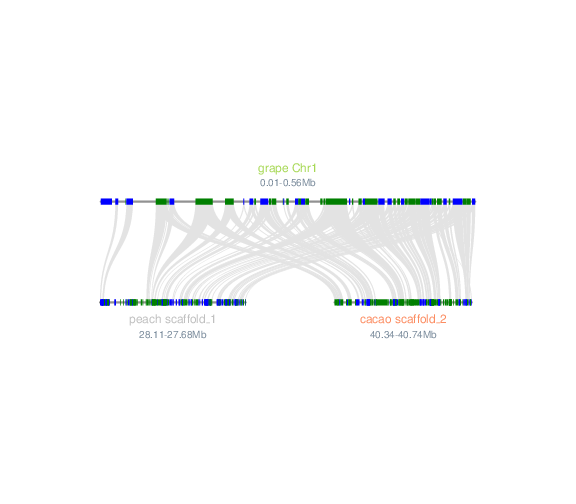

In [39]:
# display blocks2.pdf 
from wand.image import Image as WImage
img = WImage(filename="blocks2.pdf")
img

## Where to next?

Hopefully, the above examples have demonstrated you now have an environment that you can run MCScan and generate some useful results. Your next step would be to add your data and repeat. You can get to the Jupyter Dashboard by clicking the the Jupyter logo in the upper left corner of this notebook. There you can upload files from your computer using a typical GUI file handling interface. Or, you can use the command line to retrieve files.

Note that you can also use that same Jupyter Dashboard, to launch new notebooks to start working with your own data in a fresh notebook in the same session as you ran the examples above.

Remember that if you make any useful files to get them ASAP as these Binder-associated instances are temporary.